In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

Upload the data zip file in google drive. After successful upload extract the files in Google colab.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/Data/charts.zip > /dev/null

Mounted at /content/gdrive


In [6]:
# Define the paths to your image and csv folders
train_val_dir = "/content/charts/train_val" 
test_dir = "/content/charts/test" 
train_path_labels = "/content/charts/train_val" 
train_val_labels = pd.read_csv("/content/charts/train_val.csv")

In [12]:
# load training dataset in numpy array
images = [] 
labels = []
for filename in os.listdir(train_val_dir): 
  if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename)) 
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
# Append the array to the list of images 
        images.append(img_array) 
        labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images) 
np.save('y_train.npy', labels) 
x_train = np.load('x_train.npy') 
y_train = np.load('y_train.npy')

In [13]:
x_train.shape

(1000, 128, 128, 4)

In [14]:
x_train[:5]
y_train[:5]

array([522, 536, 573, 679, 670])

In [16]:
# load test dataset in numpy array
images = [] 
labels = []
for filename in os.listdir(test_dir): 
  if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
    img = cv2.imread(os.path.join(test_dir, filename)) 
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#       img = Image.open(os.path.join(test_dir, filename))
    img_array = np.array(img)
# Append the array to the list of images 
    images.append(img_array) 
    labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy') 
y_test = np.load('y_test.npy')

In [17]:
x_test.shape

(50, 128, 128, 3)

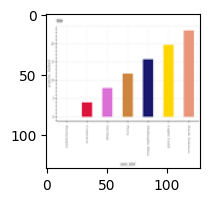

In [18]:
# check the images loaded
plt.figure(figsize = (10,2)) 
plt.imshow(x_train[10]) 
plt.imshow(x_train[208]) 
plt.imshow(x_train[444])

In [20]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie'] 
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train 
y_train.shape
y_test.shape

(50,)

In [22]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index): 
  plt.figure(figsize = (10,2)) 
  plt.imshow(x[index])
#   image_label = train_val_labels.iloc[index]['type']
#   plt.xlabel(image_label)
  plt.xlabel(image_classes[y[index]])

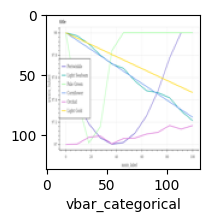

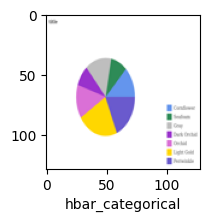

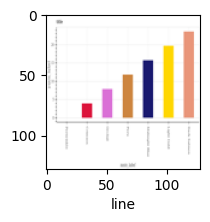

In [23]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [25]:
#normalize the image
# x_train[0]/255
x_train=x_train /255 
x_test=x_train /255

In [26]:
x_test.shape

(1000, 128, 128, 4)

In [27]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [28]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [32]:
# Define the model architecture
model = Sequential([ 
    Flatten(input_shape=(128,128,4)), 
    Dense(3000, activation='relu'), 
    Dense(1000, activation='relu'), 
    Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 44s 1s/step - loss: 6.4640 - accuracy: 0.1890
Epoch 2/10
32/32 [==============================] - 45s 1s/step - loss: 1.6214 - accuracy: 0.2130
Epoch 3/10
32/32 [==============================] - 44s 1s/step - loss: 1.6133 - accuracy: 0.2070
Epoch 4/10
32/32 [==============================] - 43s 1s/step - loss: 1.6107 - accuracy: 0.1890
Epoch 5/10
32/32 [==============================] - 43s 1s/step - loss: 1.6121 - accuracy: 0.1930
Epoch 6/10
32/32 [==============================] - 43s 1s/step - loss: 1.6096 - accuracy: 0.1790
Epoch 7/10
32/32 [==============================] - 43s 1s/step - loss: 1.6096 - accuracy: 0.2000
Epoch 8/10
32/32 [==============================] - 42s 1s/step - loss: 1.6096 - accuracy: 0.1930
Epoch 9/10
32/32 [==============================] - 42s 1s/step - loss: 1.6096 - accuracy: 0.1990
Epoch 10/10
32/32 [==============================] - 43s 1s/step - loss: 1.6096 - accuracy: 0.2000


In [33]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [34]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 3s 336ms/step - loss: 1.6088 - accuracy: 0.2400


[1.6087576150894165, 0.23999999463558197]

In [37]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]


7/7 [==============================] - 3s 334ms/step


In [38]:
print("Train Images Shape:", x_train.shape) 
print("Train Labels Shape:", y_train.shape) 
print("Test Images Shape:", x_test.shape) 
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 4)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 4)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 24s 24s/step - loss: 1.6360 - accuracy: 0.2087 - val_loss: 3.3776 - val_accuracy: 0.2200
Epoch 2/50
1/1 [==============================] - 19s 19s/step - loss: 3.4586 - accuracy: 0.1950 - val_loss: 2.0770 - val_accuracy: 0.1900
Epoch 3/50
1/1 [==============================] - 20s 20s/step - loss: 2.0684 - accuracy: 0.2025 - val_loss: 1.7569 - val_accuracy: 0.1900
Epoch 4/50
1/1 [==============================] - 16s 16s/step - loss: 1.7392 - accuracy: 0.2025 - val_loss: 1.6779 - val_accuracy: 0.1900
Epoch 5/50
1/1 [==============================] - 16s 16s/step - loss: 1.6574 - accuracy: 0.2025 - val_loss: 1.6355 - val_accuracy: 0.1850
Epoch 6/50
1/1 [==============================] - 16s 16s/step - loss: 1.6217 - accuracy: 0.2037 - val_loss: 1.6165 - val_accuracy: 0.1850
Epoch 7/50
1/1 [==============================] - 16s 16s/step - loss: 1.6090 - accuracy: 0.2037 - val_loss: 1.6103 - val_accuracy: 0.2350
Epoch 8/50
1/1 [===========

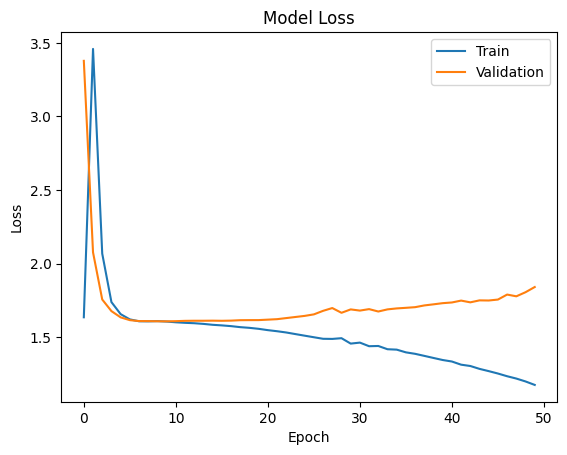

In [40]:
# modify the model architecture to cmnn
cnn_model = Sequential([
  Conv2D(filters=16 ,kernel_size=(3,3), 
  activation='relu', input_shape=(128,128,4)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(5, activation='softmax')
])


# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

# Plot the obtained loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right') 
plt.show()

In [41]:
 cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 165ms/step - loss: 1.8414 - accuracy: 0.2150


[1.841431736946106, 0.2150000035762787]

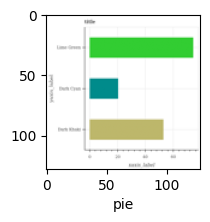

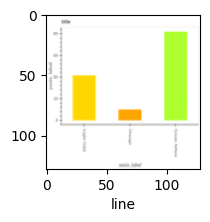

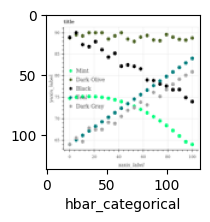

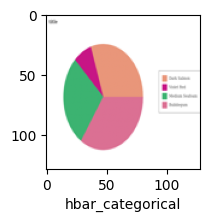

In [42]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [43]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 124ms/step


array([[0.28079486, 0.05054931, 0.267342  , 0.38772526, 0.01358853],
       [0.16049181, 0.35700476, 0.1655048 , 0.14160423, 0.17539446],
       [0.09911827, 0.26782984, 0.2631102 , 0.1105661 , 0.25937563],
       [0.336545  , 0.15201673, 0.2888466 , 0.12210164, 0.10049006],
       [0.33450854, 0.23510565, 0.06077489, 0.2743254 , 0.09528563]],
      dtype=float32)

In [44]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 0]

In [45]:
y_test[:5]

array([0, 4, 4, 4, 0])

'vbar_categorical'

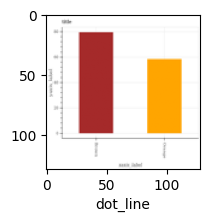

In [46]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual 
image_classes[y_classes[15]] #predicted

In [47]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.26      0.27      0.27        37
           1       0.28      0.32      0.30        44
           2       0.20      0.08      0.12        48
           3       0.15      0.24      0.18        33
           4       0.18      0.18      0.18        38

    accuracy                           0.21       200
   macro avg       0.22      0.22      0.21       200
weighted avg       0.22      0.21      0.21       200



In [48]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[10  4  5 14  4]
 [ 8 14  3 11  8]
 [ 7 10  4 14 13]
 [ 5 10  4  8  6]
 [ 8 12  4  7  7]]


Text(95.72222222222221, 0.5, 'Actual')

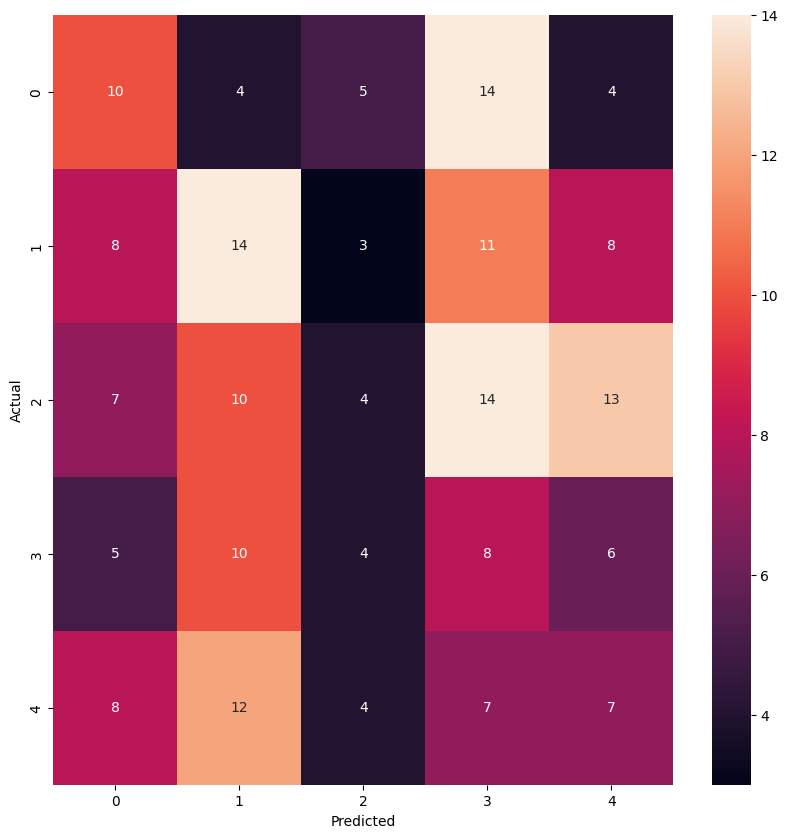

In [49]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10)) 
sn.heatmap(conf_mat,annot=True,fmt='d') 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [50]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [51]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [52]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers: 
  layer.trainable = False

In [53]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [55]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32) 
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:
# Train the model with early stopping

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True) 
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])
